Creates a movie using particles defined in the M31 simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from SolarTypeDistribution import Distribution
from ReadFile import Read
from matplotlib.colors import LogNorm

In [2]:
t,n,M31 = Read('M31_000.txt')
dis = Distribution('M31')
mask = dis.Mask(8)

In [6]:
def histogram(i):
    
    snapshot = str(i).zfill(3)
    file = './snapshots/M31_' + snapshot + '.txt'
    
    a,b,data = Read(file)
    
    h = plt.hist2d(data['x'][mask],data['y'][mask],bins=[400,400],norm=LogNorm())
    plt.xlim(-500,400)
    plt.ylim(-150,650)
    return h
    
    

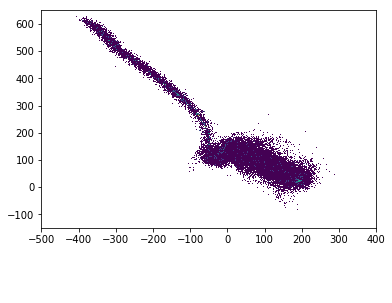

In [7]:
fig, ax = plt.subplots()
plt.xlim(-500,400)
plt.ylim(-150,650)

ani = anim.FuncAnimation(fig,histogram,frames=800)

Writer = anim.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=800)

ani.save('distribution.mp4', writer=writer)